 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

csvpath= Path("../Starter_Code/Resources/whale_returns.csv")
whales_df=pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whales_df.sort_index(inplace= True)
whales_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls

whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_nd=whales_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

csvpath2= Path("../Starter_Code/Resources/algo_returns.csv")
algo_return_df=pd.read_csv(csvpath2, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_return_df.sort_index(inplace= True)
algo_return_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls

algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_return_nd=algo_return_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices

csvpath3= Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df=pd.read_csv(csvpath3, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace= True)
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_df["Close"]=sp500_df["Close"].str.replace("$","")


In [11]:
sp500_df['Close']= sp500_df['Close'].astype("float")
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns


sp500_daily_returns = sp500_df.pct_change().dropna()


In [13]:
# Drop nulls
sp500_daily_returns


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_returns= sp500_daily_returns.rename(columns= {'Close':'S&P500'})
sp500_daily_returns

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

portfolio_daily_chg= pd.concat([sp500_daily_returns, algo_return_nd, whales_nd], axis="columns",join="outer")
portfolio_daily_chg.dropna(inplace= True)
portfolio_daily_chg

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

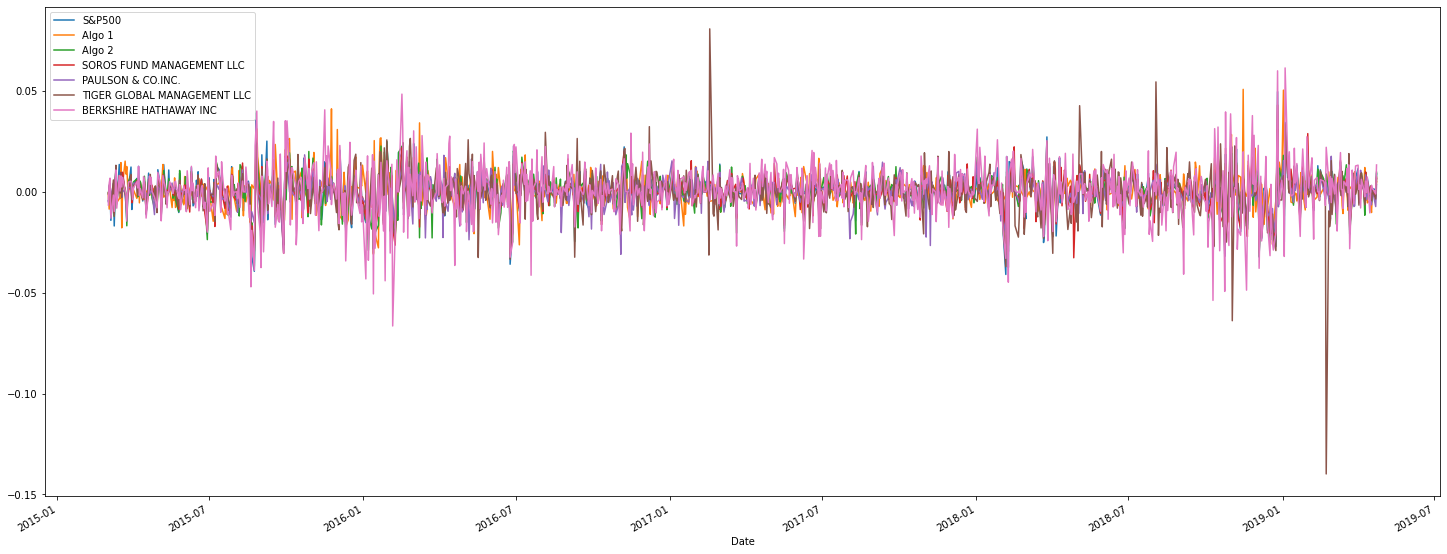

In [16]:
# Plot daily returns of all portfolios

portfolio_daily_chg.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

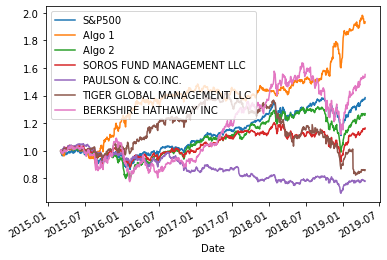

In [17]:
# Calculate cumulative returns of all portfolios

cumulative_returns= (1+ portfolio_daily_chg).cumprod()

# Plot cumulative returns

cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

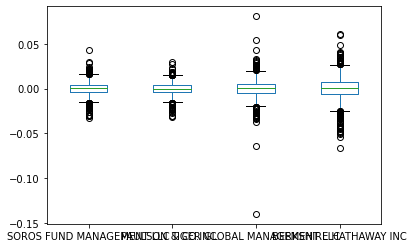

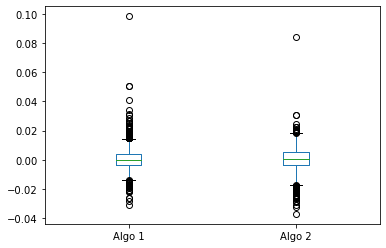

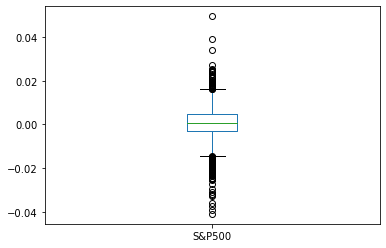

In [18]:
# Box plot to visually show risk

whales_nd.plot.box()
algo_return_nd.plot.box()
sp500_daily_returns.plot.box()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios

standard_deviation= cumulative_returns.std()
standard_deviation


S&P500                         0.144448
Algo 1                         0.232277
Algo 2                         0.131700
SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_returns_sv= sp500_daily_returns.std()
sp500_daily_returns_sv

# Determine which portfolios are riskier than the S&P 500

# Print(f"The portfolio is is riskier than S&P500 is ")


S&P500    0.008111
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)


annualized_sd = standard_deviation.std() * np.sqrt(252)
annualized_sd
# volatility.sort_values(inplace=True)

1.028424639694847

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

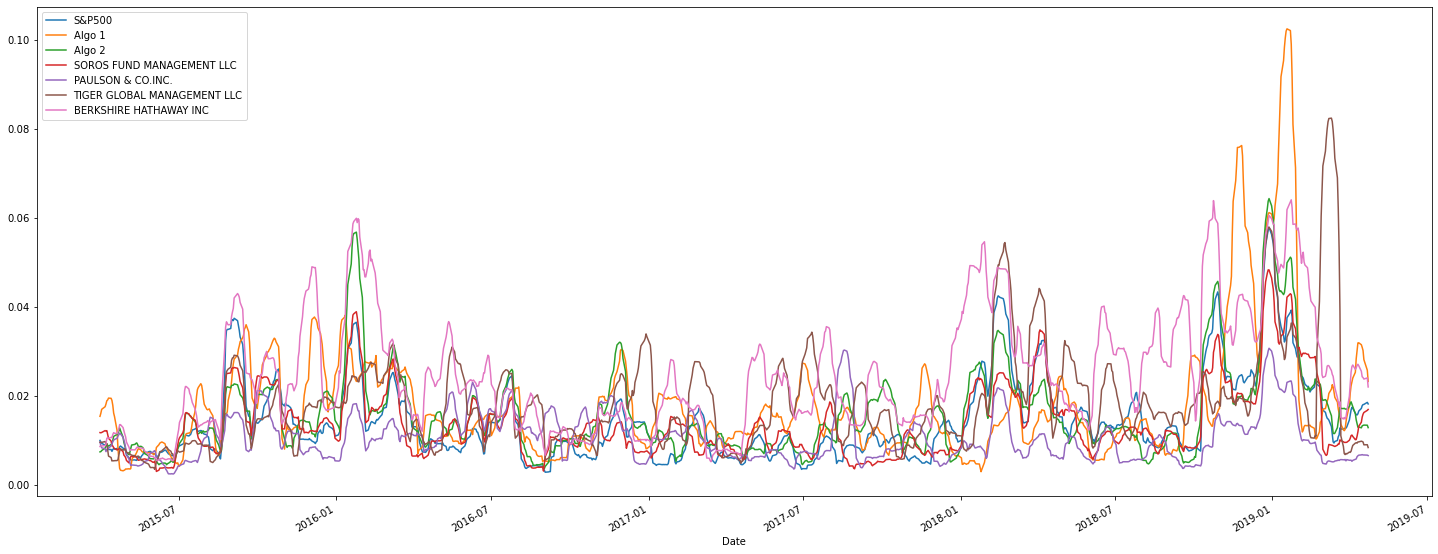

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

cumulative_returns.rolling(window=21).std().plot(figsize=(25,10))

# Plot the rolling standard deviation



### Calculate and plot the correlation

<AxesSubplot:>

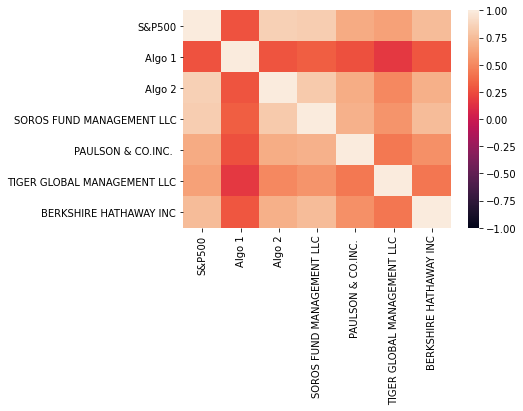

In [23]:
# Calculate the correlation

# Display de correlation matrix

correlation1 = portfolio_daily_chg.corr()
correlation1
sns.heatmap(correlation1, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Algo 1 Beta: 0.24899091459425746


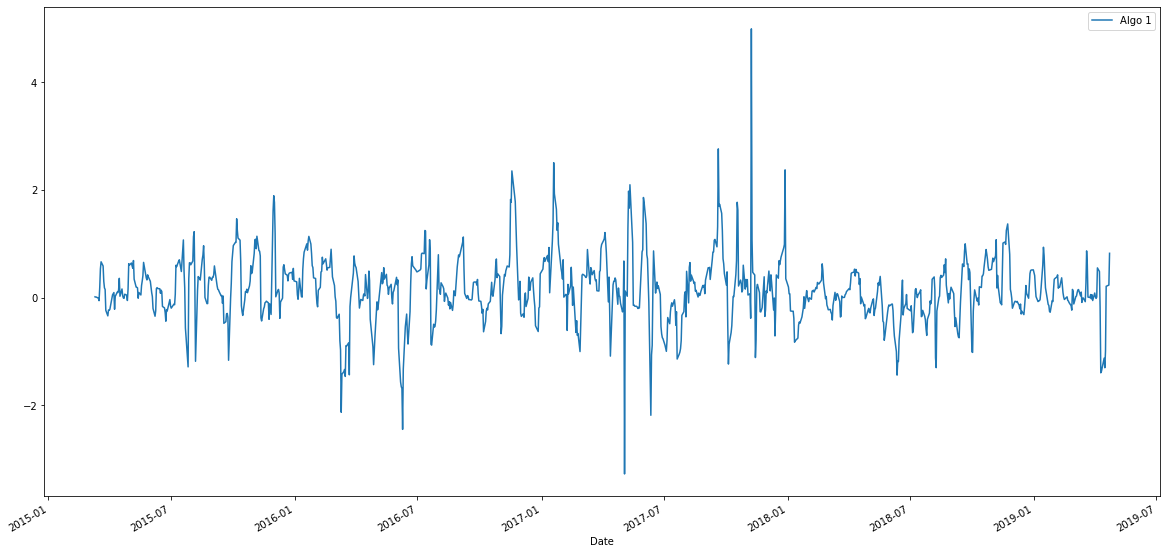

In [87]:


algo_covariance= portfolio_daily_chg["Algo 1"].cov(portfolio_daily_chg["S&P500"])

variance= portfolio_daily_chg["S&P500"].var()

beta= algo_covariance/ variance
print(f"Algo 1 Beta: {beta}")

rolling_covariance= portfolio_daily_chg["Algo 1"].rolling(window=7).cov(portfolio_daily_chg["S&P500"])
rolling_variance= portfolio_daily_chg["S&P500"].rolling(window=7).var() 
rolling_beta= rolling_covariance/ rolling_variance

ax= rolling_beta.plot(figsize=(20,10))
ax.legend(["Algo 1"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window

sp500_ewa= portfolio_daily_chg["S&P500"].ewm(span=21).mean()
sp500_ewa

Date
2015-03-03   -0.004539
2015-03-04   -0.004460
2015-03-05   -0.002392
2015-03-06   -0.005771
2015-03-09   -0.003441
                ...   
2019-04-16    0.001544
2019-04-17    0.001197
2019-04-18    0.001232
2019-04-22    0.001212
2019-04-23    0.001905
Name: S&P500, Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Exponential weighted average of sp500 portfolio'}, xlabel='Date'>

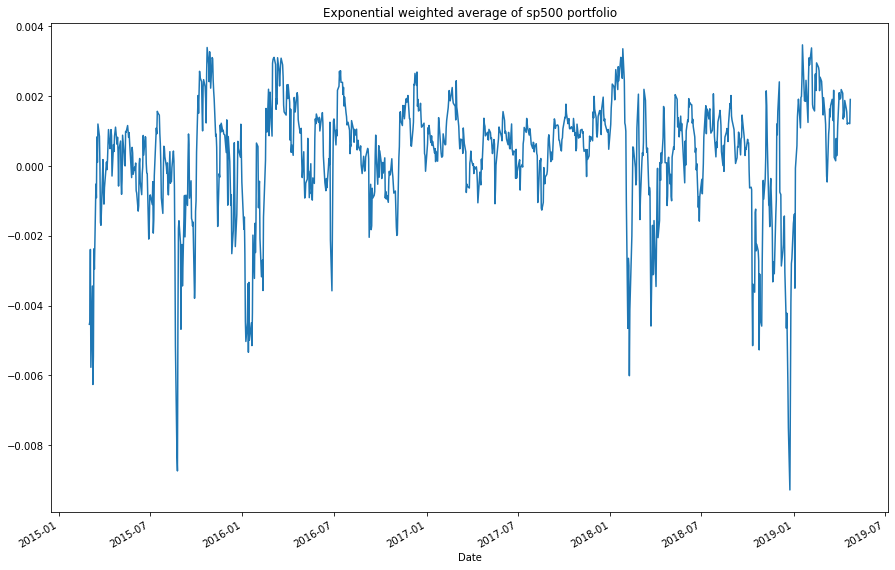

In [26]:
sp500_ewa.plot(figsize=(15,10), title="Exponential weighted average of sp500 portfolio")
               
               
               
               

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [86]:
# Annualized Sharpe Ratios

# volitility1= portfolio_returns.std() * np.sqrt(252)
# volitility1

volitility_whales= whales_nd.std() * np.sqrt(252)
volitility_whales_Sharpe=volitility_whales.mean()
print(volitility_whales_Sharpe)
volitility_algo= algo_return_nd.std() * np.sqrt(252)
volitility_algo_Sharpe=volitility_algo.mean()
print(volitility_algo_Sharpe)
volitility_sp500= sp500_daily_returns.std() * np.sqrt(252)
volitility_sp500_Sharpe=volitility_sp500.mean()
print(volitility_sp500_Sharpe)


0.15268850476046414
0.13060096487608636
0.1287624241367024


<AxesSubplot:>

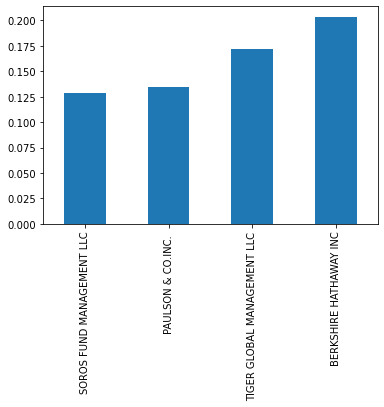

In [82]:
# Visualize the sharpe ratios as a bar plot

volitility_algo.plot(kind="bar")


<AxesSubplot:>

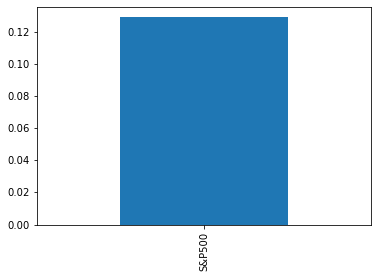

In [83]:
volitility_sp500.plot(kind="bar")

<AxesSubplot:>

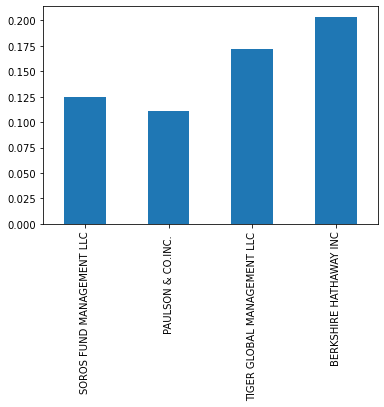

In [84]:
volitility_whales.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The Algorithmic Portfolio's Sharpe Ratio of 0.13060096487608636 outperformed S&P 500's Sharpe Ratio of 0.1287624241367024. However, the Whales Portfolio has a Sharpe Ratio of 0.15268850476046414, which outperforms the Algorithmic Portfolio. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [90]:
# Reading data from 1st stock

csvpath4= Path("../Starter_Code/Resources/goog_historical.csv")
goog=pd.read_csv(csvpath4, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog.sort_index(inplace= True)
goog
# goog=pd.read_csv(csvpath4)
# goog.head()



,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [91]:
# Reading data from 2nd stock

csvpath5= Path("../Starter_Code/Resources/aapl_historical.csv")
appl=pd.read_csv(csvpath5, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
appl.sort_index(inplace= True)
appl

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [92]:
# Reading data from 3rd stock

csvpath6= Path("../Starter_Code/Resources/cost_historical.csv")
cost=pd.read_csv(csvpath6, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost.sort_index(inplace= True)
cost
# cost=pd.read_csv(csvpath6)
# cost

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [93]:
# Combine all stocks in a single DataFrame

all_prices = pd.concat([goog, appl, cost], axis=0, join="inner")


In [94]:
# Reset Date index

all_prices = all_prices.reset_index()

In [95]:
# Reorganize portfolio data by having a column per symbol

all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [96]:
# Calculate daily returns
# Drop NAs
# Display sample data
all_returns = all_prices.pct_change().dropna()
all_returns


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

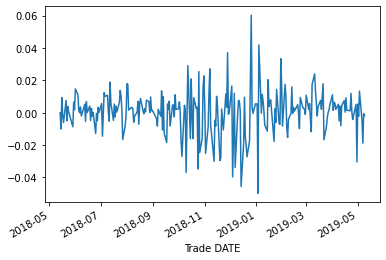

In [97]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns= all_returns.dot(weights)
portfolio_returns.plot()

# Display sample data


In [98]:
portfolio_returns["Portfolio Return"]= portfolio_returns



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Join your returns DataFrame to the original returns DataFrame


portfolio_returns2 = pd.concat([portfolio_returns,all_returns], axis=1, join="inner")
# portfolio_returns2 = portfolio_returns2.rename(columns={'0': 'Portfolio'}, inplace= True)
portfolio_returns2


,0,AAPL,COST,GOOG
Trade DATE,,,,
2018-05-14,1.54408e-05,-0.002333,0.000613,0.001766
2018-05-15,-0.0100636,-0.009088,-0.002042,-0.019060
2018-05-16,0.00940324,0.009333,0.016523,0.002354
2018-05-17,-0.00159482,-0.006324,0.004479,-0.002940
2018-05-18,-0.00606062,-0.003637,-0.003206,-0.011339
...,...,...,...,...
2019-05-03,0.0133287,0.012431,0.007953,0.019602
2019-05-06,-0.00455703,-0.015443,-0.001594,0.003366
2019-05-07,-0.0187984,-0.026957,-0.016583,-0.012855


In [106]:
# portfolio_returns2=portfolio_returns2.rename(columns={0: 'Portfolio'}, inplace= True)
# portfolio_returns2


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized `std`

volitility2= portfolio_returns.std() * np.sqrt(252)
volitility2

TypeError: setting an array element with a sequence.

### Calculate and plot rolling `std` with 21-day window

In [108]:
# Calculate rolling standard deviation

portfolio_returns.rolling(window=21).mean().plot()

# Plot rolling standard deviation


DataError: No numeric types to aggregate

### Calculate and plot the correlation

In [109]:
# Calculate and plot the correlation


correlation2 = all_returns.corr()
correlation2

sns.heatmap(correlation, vmin=-1, vmax=1)


NameError: name 'correlation' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [110]:
# Calculate and plot Beta



portfolio_returns_covariance= portfolio_returns.cov(portfolio_daily_chg["S&P500"])

variance2= portfolio_daily_chg["S&P500"].var()

beta2= portfolio_returns_covariance/ variance2
print(f"Portfolio Beta: {beta}")

rolling_covariance2= portfolio_returns.rolling(window=60).cov(portfolio_daily_chg["S&P500"])
rolling_variance2= portfolio_daily_chg["S&P500"].rolling(window=60).var() 
rolling_beta2= rolling_covariance2/ rolling_variance2

# sns.lmplot(x="S&P500", y="Algo 1", data= portfolio_daily_chg, aspect=1.5, fit_reg=True)
ax= rolling_beta.plot(figsize=(20,10))
ax.legend(["Portfolio"])

AttributeError: 'float' object has no attribute 'shape'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [111]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios= ((all_returns.mean()-0)*252)/ (all_returns.std()*np.sqrt(252))
sharpe_ratios

# market return after risk free rate is 0

Symbol
AAPL    0.361306
COST    1.160482
GOOG    0.349657
dtype: float64

<AxesSubplot:xlabel='Symbol'>

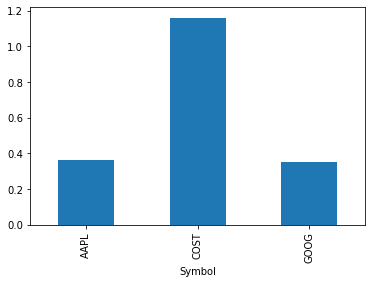

In [112]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

sotkcdialy


